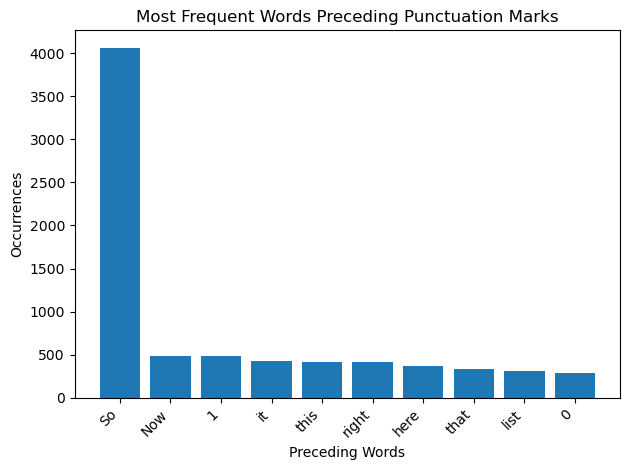

In [1]:
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Read your training data (assuming it's in 'train.txt')
with open('train.txt', 'r', encoding='utf-8') as file:
    training_data = file.read()

# Tokenize the text into words
words = word_tokenize(training_data)

# Identify words that precede punctuation marks
preceding_words = [words[i-1] for i in range(1, len(words)) if re.match(r'[.,?!]', words[i])]

# Count occurrences of each word
word_counts = Counter(preceding_words)

# Get the most frequent words
most_common_words = word_counts.most_common(10)  # Adjust the number as needed

# Separate words and counts for plotting
top_words, counts = zip(*most_common_words)

# Plot the results
plt.bar(top_words, counts)
plt.xlabel('Preceding Words')
plt.ylabel('Occurrences')
plt.title('Most Frequent Words Preceding Punctuation Marks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


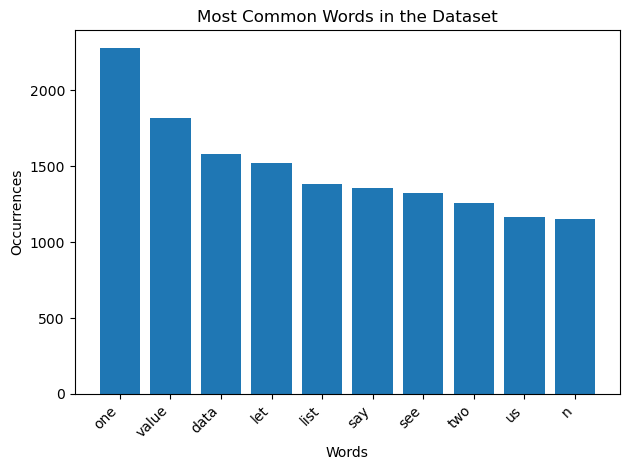

In [2]:
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Read your training data (assuming it's in 'train.txt')
with open('train.txt', 'r', encoding='utf-8') as file:
    training_data = file.read()

# Tokenize the text into words
words = word_tokenize(training_data)

# Remove stop words (common words that usually don't provide much information)
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Count occurrences of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Adjust the number as needed

# Separate words and counts for plotting
top_words, counts = zip(*most_common_words)

# Plot the results
plt.bar(top_words, counts)
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Most Common Words in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


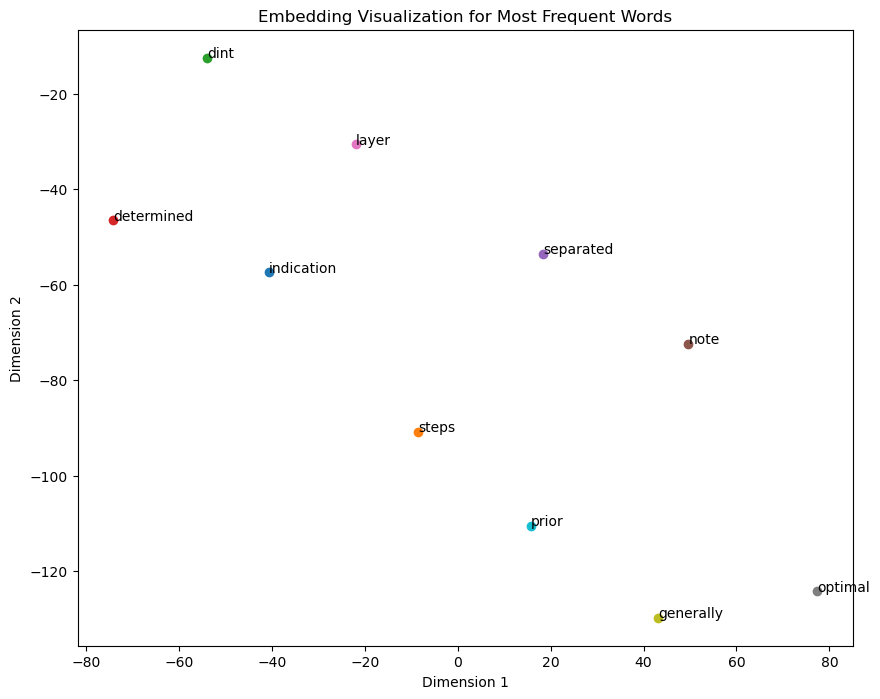

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Read your training data (assuming it's in 'train.txt')
with open('train.txt', 'r', encoding='utf-8') as file:
    training_data = file.read()

# Tokenize the text into words
words = word_tokenize(training_data)

# Remove stop words (common words that usually don't provide much information)
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Check if there are enough words after preprocessing
if len(filtered_words) == 0:
    raise ValueError("Not enough words for training.")

# Train a Word2Vec model (you may need to adjust parameters based on your specific use case)
model = Word2Vec(sentences=[filtered_words], vector_size=100, window=5, min_count=5, workers=4)

# Get embeddings for the most frequent words
most_common_words = [word for word, _ in model.wv.most_similar(positive=[filtered_words[0]], topn=10)]  # Adjust the number as needed
word_embeddings = np.array([model.wv[word] for word in most_common_words])

# Apply t-SNE for dimensionality reduction with reduced perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)

# Plot the results
plt.figure(figsize=(10, 8))
for i, word in enumerate(most_common_words):
    plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1])
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('Embedding Visualization for Most Frequent Words')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


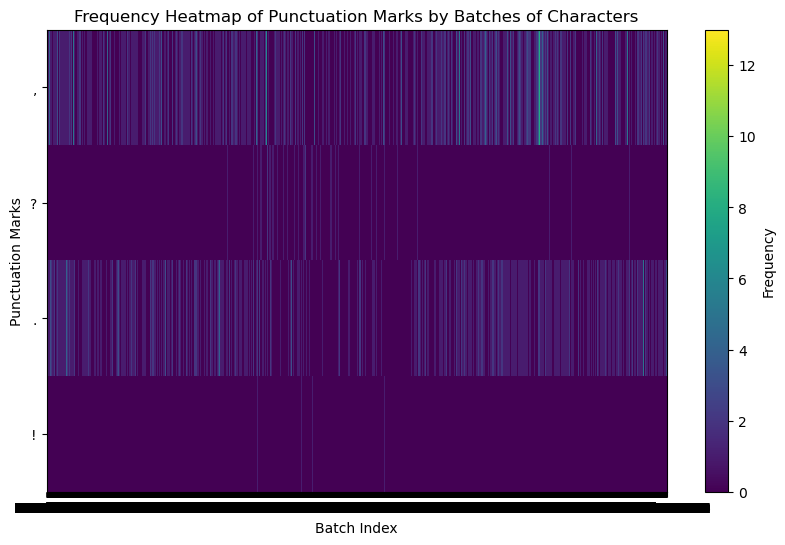

In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Read your training data (assuming it's in 'train.txt')
with open('train.txt', 'r', encoding='utf-8') as file:
    training_data = file.read()

# Tokenize the text into characters
characters = list(training_data)

# Define a list of punctuation marks
punctuation_marks = [',', '?', '.', '!']

# Create batches of characters
batch_size = 100
batches = [characters[i:i + batch_size] for i in range(0, len(characters), batch_size)]

# Count the frequency of each punctuation mark in each batch
frequency_matrix = np.zeros((len(batches), len(punctuation_marks)))

for i, batch in enumerate(batches):
    for j, punctuation_mark in enumerate(punctuation_marks):
        frequency_matrix[i, j] = batch.count(punctuation_mark)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(frequency_matrix.T, cmap='viridis', interpolation='nearest', aspect='auto')

# Set the axis labels and ticks
plt.xticks(np.arange(len(batches)), [f'Batch {i+1}' for i in range(len(batches))])
plt.yticks(np.arange(len(punctuation_marks)), punctuation_marks)

# Add colorbar
plt.colorbar(label='Frequency')

# Set plot title and labels
plt.title('Frequency Heatmap of Punctuation Marks by Batches of Characters')
plt.xlabel('Batch Index')
plt.ylabel('Punctuation Marks')

plt.show()
